In [0]:
#For Google Collab
from google.colab import drive, auth
from googleapiclient.discovery import build
#For data manipulation
import numpy as np 
import pandas as pd 
import random
#For directory and import of data
import os
import glob                                                           
import cv2 
import shutil
#For Plotting
import matplotlib.pyplot as plt

In [2]:
# Load the Drive helper and mount
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
auth.authenticate_user()

In [0]:
drive_service = build('drive', 'v3')

Here I created JPEG files from the pulmonary data to match the same format as the pnuemonia dataset. 

In [0]:
#create jpg files for png files
pngs = glob('/content/drive/My Drive/Chest_X_rays/ChinaSet_AllFiles/CXR_png/*.png')

for j in pngs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)

In [0]:
#create jpg files for png files
pngs = glob('/content/drive/My Drive/Chest_X_rays/MontgomerySet/CXR_png/*.png')

for j in pngs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)

In [0]:
#move JPEG files to JPEG folder
sourcepath= '/content/drive/My Drive/Chest_X_rays/MontgomerySet/Png/'
sourcefiles = os.listdir(sourcepath)
destinationpath = '/content/drive/My Drive/Chest_X_rays/MontgomerySet/CXR_jpg/'
for file in sourcefiles:
  if file.endswith('.jpg'):
    shutil.move(os.path.join(sourcepath,file), os.path.join(destinationpath,file))

Pulling in all the directories to explore the datasets.

In [0]:
#All directories

#Train Data Directory
Train_Path_Normal = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/train/NORMAL')
Train_Path_Pneumonia = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/train/PNEUMONIA')
Train_Path_Pulmonary = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/train/PULMONARY')

#Test Data Directory
Test_Path_Normal = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/test/NORMAL')
Test_Path_Pneumonia = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/test/PNEUMONIA')
Test_Path_Pulmonary = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/test/PULMONARY')

#Val Data Directory
Val_Path_Normal = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/val/NORMAL')
Val_Path_Pneumonia = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/val/PNEUMONIA')
Val_Path_Pulmonary = os.listdir('../content/drive/My Drive/Chest_X_rays/All_Chest/val/PULMONARY')

Grabbing a random set of 10 images from the all normal images.

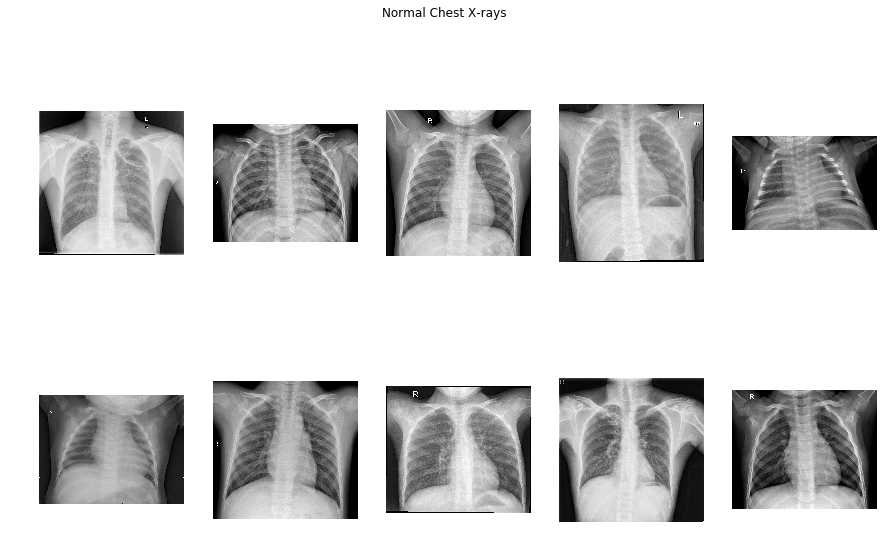

In [6]:
#View Normal training data

#Produce 10 random images from Normal Path
random_img = random.sample(Train_Path_Normal,10)

fig,ax = plt.subplots(2,5,figsize=(15,9))

for x in range(0,10):
  im = cv2.imread('/content/drive/My Drive/Chest_X_rays/All_Chest/train/NORMAL/'+random_img[x])
  ax[x//5,x%5].imshow(im)
  ax[x//5,x%5].axis('off')
  
fig.suptitle('Normal Chest X-rays')
plt.show()


Grabbing a random set of 10 images from the all pneumonia images.

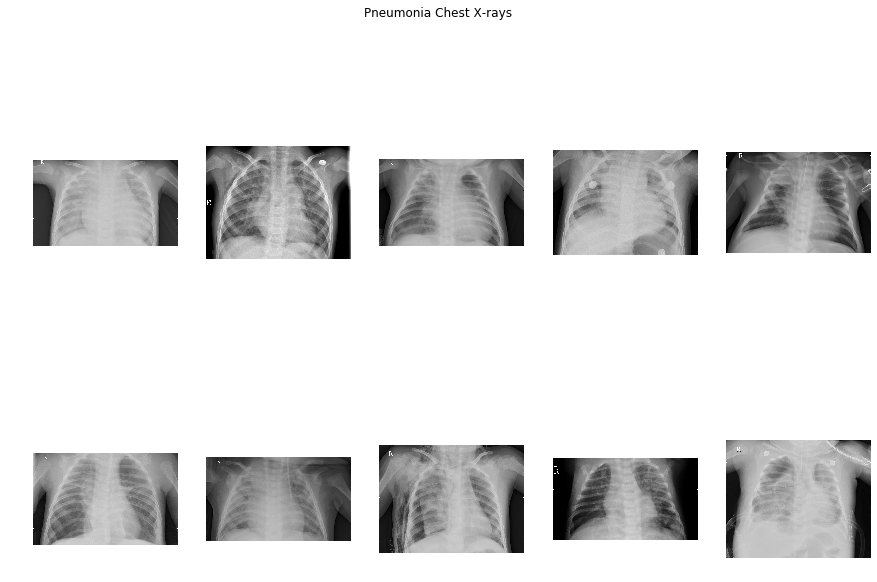

In [7]:
#View Pnuemonia training data

#Produce 10 random images from Pneumonia Path
random_img = random.sample(Train_Path_Pneumonia,10)

fig,ax = plt.subplots(2,5,figsize=(15,10))

for x in range(0,10):
  im = cv2.imread('/content/drive/My Drive/Chest_X_rays/All_Chest/train/PNEUMONIA/'+random_img[x])
  ax[x//5,x%5].imshow(im)
  ax[x//5,x%5].axis('off')
  
fig.suptitle('Pneumonia Chest X-rays')
plt.show()

Grabbing a random set of 10 images from the all pulmonary images.

In [0]:
#View Pulmonary training data

#Produce 10 random images from Pulmonary Path
random_img = random.sample(Train_Path_Pulmonary,10)

fig,ax = plt.subplots(2,5,figsize=(15,9))

for x in range(0,10):
  im = cv2.imread('/content/drive/My Drive/Chest_X_rays/All_Chest/train/PULMONARY/'+random_img[x])
  ax[x//5,x%5].imshow(im)
  ax[x//5,x%5].axis('off')
  
fig.suptitle('Pulmonary Chest X-rays')
plt.show()

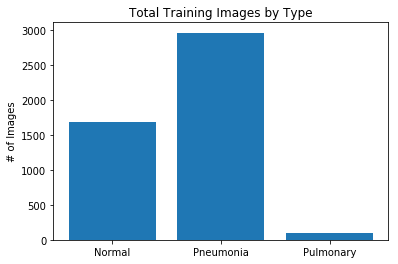

In [8]:
#Plot image counts
objects = ('Normal', 'Pneumonia', 'Pulmonary')
y = np.arange(len(objects))
counts =[len(Train_Path_Normal), len(Train_Path_Pneumonia), len(Train_Path_Pulmonary)]

plt.bar(y, counts, align='center')
plt.xticks(y,objects)
plt.ylabel('# of Images')
plt.title('Total Training Images by Type')

plt.show()

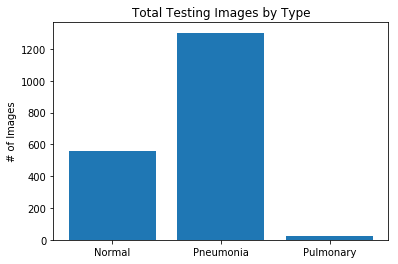

In [9]:
#Plot image counts
objects = ('Normal', 'Pneumonia', 'Pulmonary')
y = np.arange(len(objects))
counts =[len(Test_Path_Normal), len(Test_Path_Pneumonia), len(Test_Path_Pulmonary)]

plt.bar(y, counts, align='center')
plt.xticks(y,objects)
plt.ylabel('# of Images')
plt.title('Total Testing Images by Type')

plt.show()